<a href="https://colab.research.google.com/github/Godwin-88/FinancialTimeSeriesAnalysis/blob/main/kk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt


In [2]:
# Load the Excel file
df = pd.read_excel('/content/China (1).xlsx', index_col='Year')  # Assuming the first column is 'Year' and used as index


In [3]:
df.head()

,GDP (current US$),"Taxes on income, profits and capital gains (% of total taxes)","Foreign direct investment, net inflows (% of GDP)","Net trade in goods and services (BoP, current US$)"
Year,,,,
1960,5.971625e+10,0.0,0.0,0
1961,5.005669e+10,0.0,0.0,0
1962,4.720919e+10,0.0,0.0,0
1963,5.070661e+10,0.0,0.0,0
1964,5.970813e+10,0.0,0.0,0


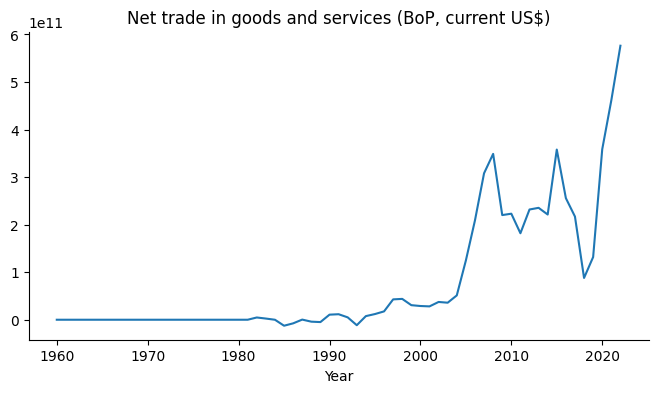

In [8]:
# @title Net trade in goods and services (BoP, current US$)

from matplotlib import pyplot as plt
df['Net trade in goods and services (BoP, current US$)'].plot(kind='line', figsize=(8, 4), title='Net trade in goods and services (BoP, current US$)')
plt.gca().spines[['top', 'right']].set_visible(False)

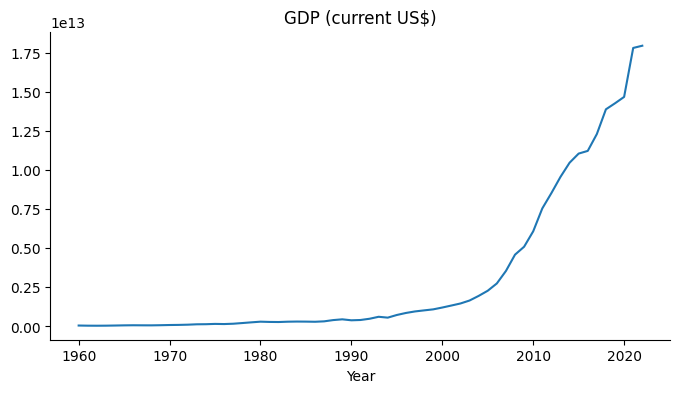

In [7]:
# @title GDP (current US$)

from matplotlib import pyplot as plt
df['GDP (current US$)'].plot(kind='line', figsize=(8, 4), title='GDP (current US$)')
plt.gca().spines[['top', 'right']].set_visible(False)

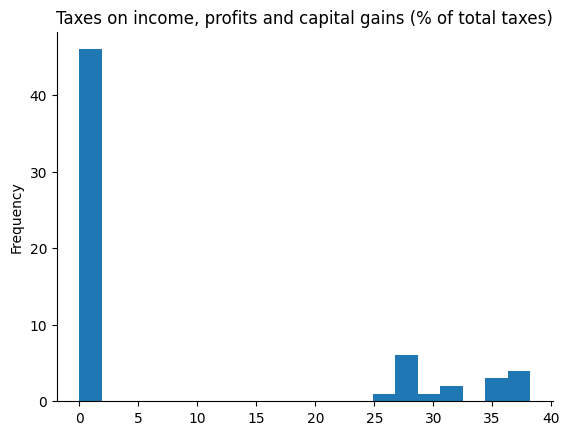

In [6]:
# @title Taxes on income, profits and capital gains (% of total taxes)

from matplotlib import pyplot as plt
df['Taxes on income, profits and capital gains (% of total taxes)'].plot(kind='hist', bins=20, title='Taxes on income, profits and capital gains (% of total taxes)')
plt.gca().spines[['top', 'right',]].set_visible(False)

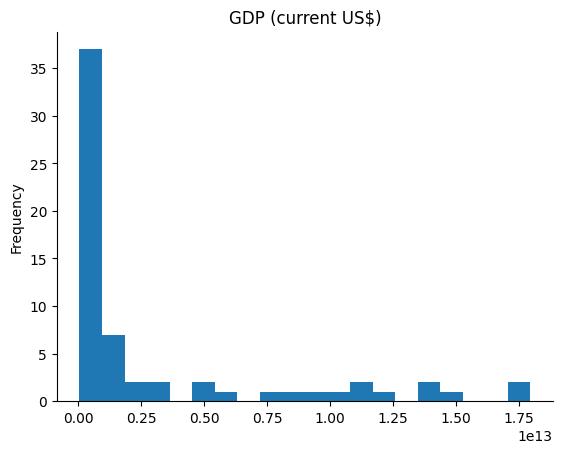

In [5]:
# @title GDP (current US$)

from matplotlib import pyplot as plt
df['GDP (current US$)'].plot(kind='hist', bins=20, title='GDP (current US$)')
plt.gca().spines[['top', 'right',]].set_visible(False)

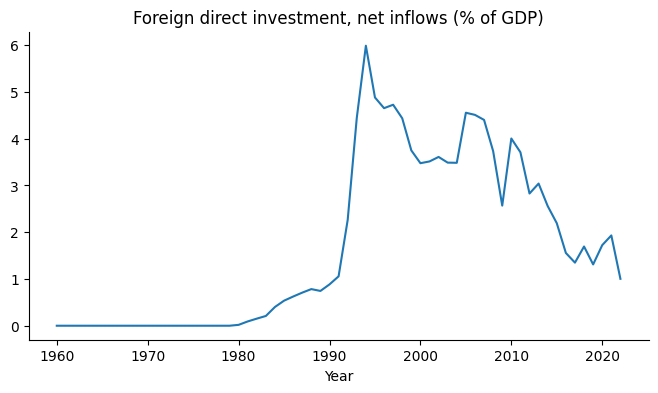

In [4]:
# @title Foreign direct investment, net inflows (% of GDP)

from matplotlib import pyplot as plt
df['Foreign direct investment, net inflows (% of GDP)'].plot(kind='line', figsize=(8, 4), title='Foreign direct investment, net inflows (% of GDP)')
plt.gca().spines[['top', 'right']].set_visible(False)

In [11]:
gdp_series = df['GDP (current US$)']


In [12]:
result = adfuller(gdp_series.dropna())  # Drop NA values if any
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
# If p-value > 0.05, the data is not stationary, and you might need to difference the data


ADF Statistic: 0.206763
p-value: 0.972638


In [14]:
import statsmodels.tsa.stattools as smt

In [15]:
smt.acf(gdp_series.dropna())

array([ 1.        ,  0.91638679,  0.82590242,  0.75916937,  0.68693202,
        0.61030193,  0.54345022,  0.48076947,  0.4129055 ,  0.34486798,
        0.2804558 ,  0.22010669,  0.16483041,  0.12091271,  0.08302393,
        0.0472036 ,  0.01960541, -0.00173967])

In [16]:
acf_values = smt.acf(gdp_series.dropna())
pacf_values = smt.pacf(gdp_series.dropna())

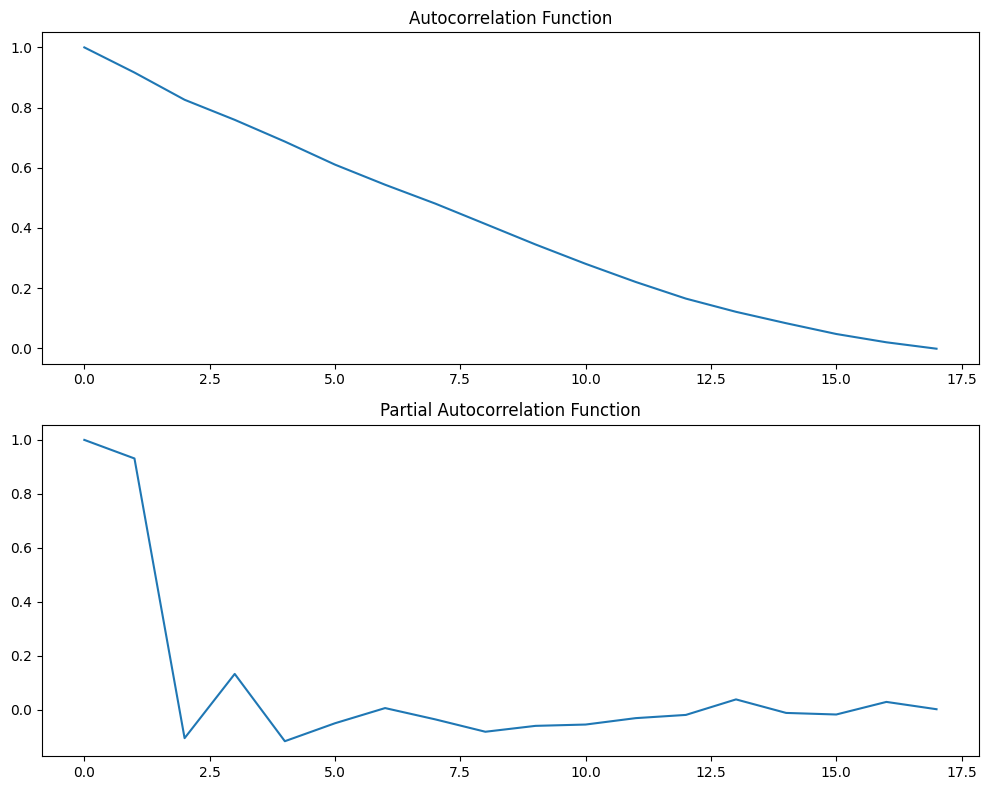

In [17]:
# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

# Plot the ACF on the first subplot
ax1.plot(acf_values)
ax1.set_title('Autocorrelation Function')

# Plot the PACF on the second subplot
ax2.plot(pacf_values)
ax2.set_title('Partial Autocorrelation Function')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

Stationarity of X variables

In [18]:
import pandas as pd
from statsmodels.tsa.stattools import adfuller

In [19]:
def check_stationarity(series):
    result = adfuller(series)
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    if result[1] < 0.05:
        print('Series is likely stationary.')
    else:
        print('Series is likely non-stationary.')

In [20]:
for column in df:
    check_stationarity(df[column])

ADF Statistic: 0.20676287782942712
p-value: 0.9726383624806924
Series is likely non-stationary.
ADF Statistic: -1.6714322374145838
p-value: 0.44588827557471034
Series is likely non-stationary.
ADF Statistic: -1.6186928564940313
p-value: 0.4734146495326145
Series is likely non-stationary.
ADF Statistic: 1.8557379993893939
p-value: 0.9984533870746205
Series is likely non-stationary.


In [22]:
# Load the data

# Calculate the first difference of the 'sales' series
differenced_tax = df['Taxes on income, profits and capital gains (% of total taxes)'].diff().dropna()

# Check for stationarity
check_stationarity(differenced_tax)

ADF Statistic: -4.670048876356584
p-value: 9.57580589566116e-05
Series is likely stationary.


In [23]:

# Calculate the first difference of the 'sales' series
differenced_NEX = df['Net trade in goods and services (BoP, current US$)'].diff().dropna()

# Check for stationarity
check_stationarity(differenced_NEX)

ADF Statistic: -2.5348265935680394
p-value: 0.10722891247172561
Series is likely non-stationary.


In [24]:

# Calculate the first difference of the 'sales' series
differenced_FDI= df['Foreign direct investment, net inflows (% of GDP)'].diff().dropna()

# Check for stationarity
check_stationarity(differenced_FDI)

ADF Statistic: -5.996281286868686
p-value: 1.6985922517262021e-07
Series is likely stationary.


In [25]:

# Calculate the first difference of the 'sales' series
differenced_GDP = df['GDP (current US$)'].diff().dropna()

# Check for stationarity
check_stationarity(differenced_GDP)

ADF Statistic: 2.1003616261567797
p-value: 0.9987899769489927
Series is likely non-stationary.


In [26]:
check_stationarity(differenced_GDP.diff().dropna())

ADF Statistic: -2.2529625053796325
p-value: 0.18758730597548845
Series is likely non-stationary.


In [27]:
# prompt: perform second order differencing on df and remove the missing values. sAVE THE NEW AS A DATAFRAME

df_differenced = df.diff().diff().dropna()


In [28]:
df_differenced.head()

,GDP (current US$),"Taxes on income, profits and capital gains (% of total taxes)","Foreign direct investment, net inflows (% of GDP)","Net trade in goods and services (BoP, current US$)"
Year,,,,
1962,6.812064e+09,0.0,0.0,0.0
1963,6.344928e+09,0.0,0.0,0.0
1964,5.504083e+09,0.0,0.0,0.0
1965,1.726373e+09,0.0,0.0,0.0
1966,-4.443887e+09,0.0,0.0,0.0


In [33]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Assuming df_differenced is a DataFrame with the differenced GDP series

max_d = 2
max_q = 2
max_p = 2

results = []
for d in range(max_d + 1):
    for q in range(max_q + 1):
        for p in range(max_p + 1):
            try:
                model = ARIMA(df_differenced['GDP (current US$)'], order=(p, d, q))
                model_fit = model.fit()
                results.append({
                    'p': p,
                    'd': d,
                    'q': q,
                    'AIC': model_fit.aic,
                    'BIC': model_fit.bic
                })
            except Exception as e:
                print(f"Failed to fit ARIMA({p}, {d}, {q}): {e}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

    p  d  q          AIC          BIC
0   0  0  0  3672.304941  3676.526689
1   1  0  0  3460.080116  3466.412738
2   2  0  0  3420.237639  3428.681134
3   0  0  1  3449.904426  3456.237048
4   1  0  1  3444.440090  3452.883586
5   2  0  1  3421.077000  3431.631369
6   0  0  2  3443.445391  3451.888886
7   1  0  2  3441.993225  3452.547594
8   2  0  2  3421.048008  3433.713251
9   0  1  0  3476.630207  3478.724551
10  1  1  0  3457.808170  3461.996859
11  2  1  0  3408.542149  3414.825183
12  0  1  1  3436.302142  3440.490831
13  1  1  1  3416.757774  3423.040808
14  2  1  1  3366.482056  3374.859435
15  0  1  2  3421.041415  3427.324449
16  1  1  2  3412.709302  3421.086680
17  2  1  2  3369.099633  3379.571356
18  0  2  0  3459.902975  3461.980513
19  1  2  0  3454.832636  3458.987711
20  2  2  0  3402.765585  3408.998197
21  0  2  1  3427.508997  3431.664071
22  1  2  1  3415.390363  3421.622976
23  2  2  1  3350.703662  3359.013812
24  0  2  2  3411.353757  3417.586370
25  1  2  2 

In [34]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd

# Assuming df_differenced is a DataFrame with the differenced GDP series

max_d = 2
max_q = 2
max_p = 2

results = []
for d in range(max_d + 1):
    for q in range(max_q + 1):
        for p in range(max_p + 1):
            try:
                # Fit the ARIMA model
                model = ARIMA(df_differenced['GDP (current US$)'], order=(p, d, q))
                model_fit = model.fit()

                # Store the summary of the model in a string format
                summary = model_fit.summary().as_text()

                # Append the results including AIC, BIC, and the model summary
                results.append({
                    'p': p,
                    'd': d,
                    'q': q,
                    'AIC': model_fit.aic,
                    'BIC': model_fit.bic,
                    'Summary': summary
                })
            except Exception as e:
                print(f"Failed to fit ARIMA({p}, {d}, {q}): {e}")

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# To view the summary of each model, iterate over the results
for result in results:
    print(f"ARIMA({result['p']},{result['d']},{result['q']}):")
    print(result['Summary'])
    print("\n\n")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dat

ARIMA(0,0,0):
                               SARIMAX Results                                
Dep. Variable:      GDP (current US$)   No. Observations:                   61
Model:                          ARIMA   Log Likelihood               -1834.152
Date:                Mon, 11 Mar 2024   AIC                           3672.305
Time:                        09:59:01   BIC                           3676.527
Sample:                             0   HQIC                          3673.959
                                 - 61                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.498e+09   4.53e+12      0.001      1.000   -8.87e+12    8.87e+12
sigma2      2.049e+25      0.041      5e+26      0.000    2.05e+25    2.05e+25
Ljung-Box (L1) (Q):                  1

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [42]:
df_differenced = df.diff().diff().dropna()


In [44]:
print(df_differenced.index[:5])


DatetimeIndex(['1962-01-01', '1963-01-01', '1964-01-01', '1965-01-01',
               '1966-01-01'],
              dtype='datetime64[ns]', name='Year', freq=None)


In [45]:
if not isinstance(df_differenced.index, pd.DatetimeIndex):
    df_differenced.index = pd.to_datetime(df_differenced.index, format='%Y')
df_differenced.index = pd.DatetimeIndex(df_differenced.index, freq='AS')


In [46]:
if df_differenced.empty:
    raise ValueError("The DataFrame 'df_differenced' is empty. Check your data processing steps.")


In [48]:
from statsmodels.tsa.vector_ar.var_model import VAR

# Fit the VAR model
model = VAR(df_differenced)
model_fit = model.fit()

# Determine the optimal lag order if you haven't done so already
optimal_lag = model_fit.k_ar




In [50]:
# Get the summary of the model
model_summary = model_fit.summary()

# Print the summary
print(model_summary)

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 11, Mar, 2024
Time:                     10:29:23
--------------------------------------------------------------------
No. of Equations:         4.00000    BIC:                    106.696
Nobs:                     60.0000    HQIC:                   106.271
Log likelihood:          -3500.47    FPE:                1.08353e+46
AIC:                      105.998    Det(Omega_mle):     7.86671e+45
--------------------------------------------------------------------
Results for equation GDP (current US$)
                                                                          coefficient          std. error           t-stat            prob
------------------------------------------------------------------------------------------------------------------------------------------
const                                                              37234538067.998901  6055161